# nViz Quickstart Guide

This notebook helps demonstrate how to use `nViz` quickly.
We use demonstrational data found within this repository
to help show how the software works.

In [1]:
import pathlib
import shutil

from napari.utils import nbscreenshot

import nviz

In [2]:
# setup paths and prepare filesystem
test_image_dir = "../../../tests/data/random_tiff_z_stacks/Z99/"
test_label_dir = "../../../tests/data/random_tiff_z_stacks/labels/"
output_ome_tiff_path = "./example.ome.tiff"
output_zarr_path = "./example.zarr"
# scaling values in micrometers for z, y, and x dimensions.
# Note: This is typically a priori knowledge that is usually
# found in raw microscopy data (for example raw TIFF files
# or other microscopy metadata files [like XML]).
scaling_values = (1.0, 0.1, 0.1)

# If we already have a demo tiff file, remove it.
# (We are demoing the full nViz process from scratch.)
if (tiff_path := pathlib.Path(output_ome_tiff_path)).is_file():
    tiff_path.unlink()

# If we already have a demo zarr dir, remove it
# (We are demoing the full nViz process from scratch.)
if (zarr_path := pathlib.Path(output_zarr_path)).is_dir():
    shutil.rmtree(output_zarr_path)

In [3]:
# show our images
list(pathlib.Path(test_image_dir).rglob("*.tif"))

[PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_111_ZS001.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333_ZS001.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333_ZS000.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_111_ZS000.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_111_ZS002.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333_ZS002.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333_ZS003.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_111_ZS003.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_111_ZS007.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333_ZS007.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_444_ZS008.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_444_ZS009.tif'),
 PosixPath('../../../tests/data/random_tiff_z_stacks/Z99/Z99_333

In [4]:
# show our label files (in this case, segmentation masks)
# Other labels might include outlines, bounding boxes,
# or similar data stored as images which provide
# information about objects of interest.
list(pathlib.Path(test_label_dir).rglob("*.tif"))

[PosixPath('../../../tests/data/random_tiff_z_stacks/labels/compartment.tif')]

In [5]:
# convert original raw TIFF into OME-TIFF format using nViz

nviz_ome_tiff = nviz.tiff_to_ometiff(
    # specify an image directory (original images)
    image_dir=test_image_dir,
    # specify a label (masks or outlines) directory
    label_dir=test_label_dir,
    # specify an output path
    output_path=output_ome_tiff_path,
    # Map filename patterns to channel names.
    # Note: the keys of this dictionary correspond to information
    # found in the file name. The value pairs are customizable, and
    # they will display as specified here inside a Napari window.
    channel_map={
        "111": "Channel A",
        "222": "Channel B",
        "333": "Channel C",
        "444": "Channel D",
        "555": "Channel E",
    },
    # set the scaling for z, y, and x
    scaling_values=scaling_values,
)

# show the filepath
nviz_ome_tiff

'./example.ome.tiff'

In [6]:
# view the ome-tiff in napari
# (will open a new window and also returns the viewer object)
viewer = nviz.view_ometiff_with_napari(
    ometiff_path=nviz_ome_tiff, scaling_values=scaling_values
)

2025-01-27 12:12:34.244 python3[90363:137421061] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 12:12:34.244 python3[90363:137421061] +[IMKInputSession subclass]: chose IMKInputSession_Modern


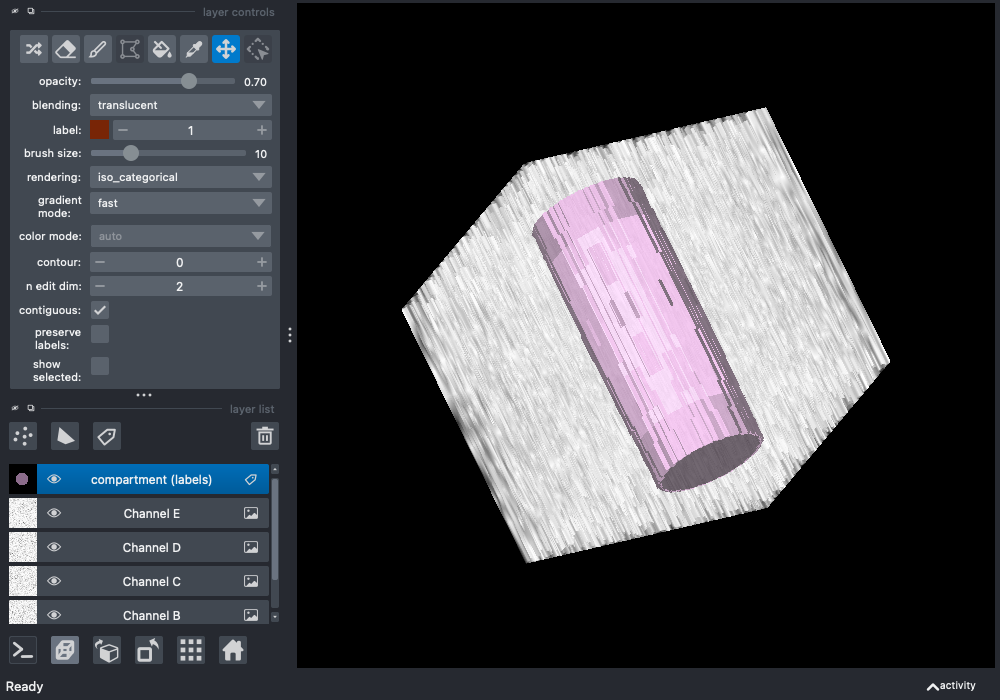

In [7]:
# show the napari window within this notebook to help demonstrate output
viewer.window.resize(1000, 700)
viewer.camera.angles = (50, 50, 30)
viewer.camera.zoom = 30
nbscreenshot(viewer=viewer, canvas_only=False)

In [8]:
# convert original data into a Zarr which
# includes OME-Zarr images format using nViz

nviz_zarr = nviz.tiff_to_zarr(
    # specify an image directory (original images)
    image_dir=test_image_dir,
    # specify a label (masks or outlines) directory
    label_dir=test_label_dir,
    # specify an output path
    output_path=output_zarr_path,
    # Map filename patterns to channel names.
    # Note: the keys of this dictionary correspond to information
    # found in the file name. The value pairs are customizable, and
    # they will display as specified here inside a Napari window.
    channel_map={
        "111": "Channel A",
        "222": "Channel B",
        "333": "Channel C",
        "444": "Channel D",
        "555": "Channel E",
    },
    # set the scaling for z, y, and x
    scaling_values=scaling_values,
)

# show the filepath
nviz_zarr

'./example.zarr'

In [9]:
# view the zarr in napari
# (will open a new window and also returns the viewer object)
viewer = nviz.view_zarr_with_napari(
    zarr_dir=output_zarr_path, scaling_values=scaling_values
)

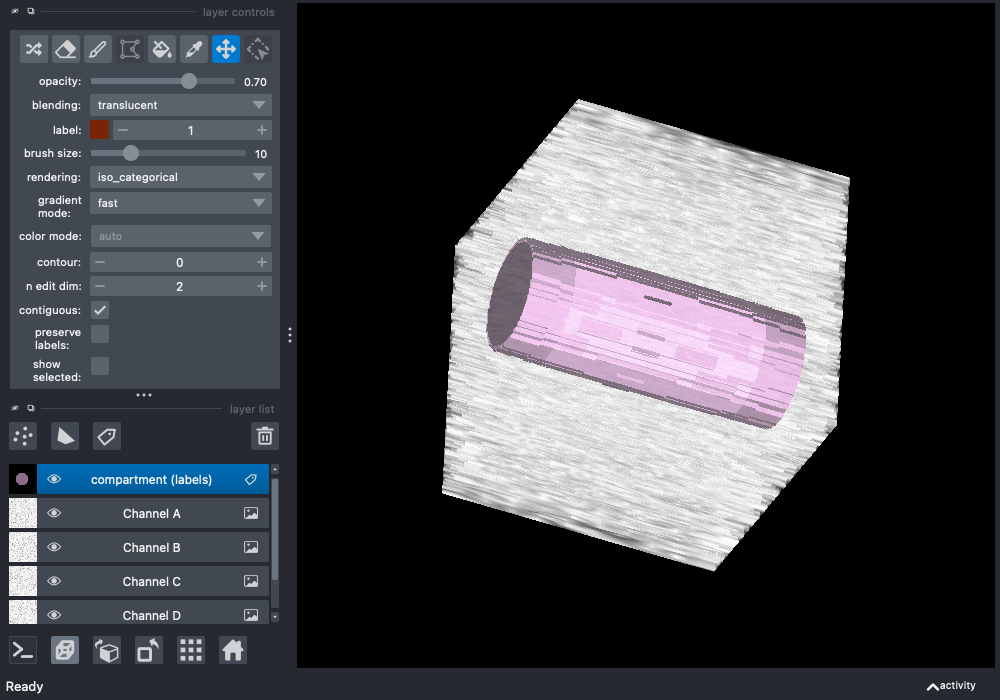

In [10]:
# show the napari window within this notebook to help demonstrate output
viewer.window.resize(1000, 700)
viewer.camera.angles = (50, 50, -30)
viewer.camera.zoom = 30
nbscreenshot(viewer=viewer, canvas_only=False)